In [2]:
import pandas as pd

# Load the CSV dataset to understand its structure and content
dataset_path = '1976-2020-president.csv'
data = pd.read_csv(dataset_path)

# Display basic information about the dataset including the first few rows to understand its structure and content
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


(None,
    year    state state_po  state_fips  state_cen  state_ic        office  \
 0  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
 1  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
 2  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
 3  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
 4  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
 
                  candidate              party_detailed writein  \
 0            CARTER, JIMMY                    DEMOCRAT   False   
 1             FORD, GERALD                  REPUBLICAN   False   
 2           MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False   
 3  BUBAR, BENJAMIN ""BEN""                 PROHIBITION   False   
 4                HALL, GUS         COMMUNIST PARTY USE   False   
 
    candidatevotes  totalvotes   version  notes party_simplified  
 0          659170     1182850  20210113    NaN         DE

In [3]:
# Cleaning the dataset involves several steps, including handling missing values, correcting data types, and potentially removing unnecessary columns.
# We'll start by identifying columns with missing values and deciding on a strategy for each.

# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


candidate          287
party_detailed     456
writein              3
notes             4287
dtype: int64

## Trend Analysis: Voting Patterns Over Time for Each Major Political Party
Let's start by visualizing how voting patterns have changed over time for the Democratic and Republican parties.

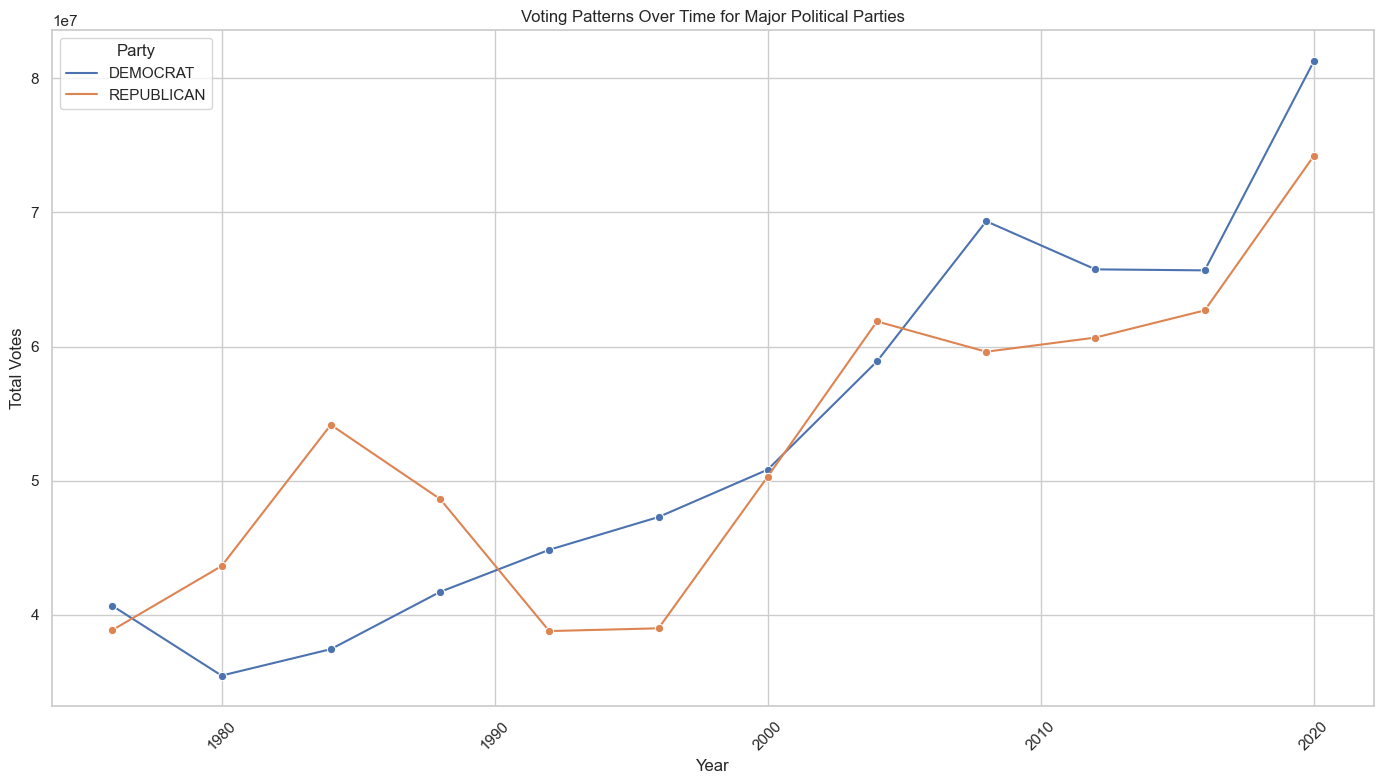

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for major parties only
major_parties = data[data['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN'])]

# Group by year and party, then sum up the votes
votes_by_year_party = major_parties.groupby(['year', 'party_simplified'])['candidatevotes'].sum().reset_index()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='candidatevotes', hue='party_simplified', data=votes_by_year_party, marker='o')
plt.title('Voting Patterns Over Time for Major Political Parties')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend(title='Party')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization above shows the voting patterns over time for the Democratic and Republican parties from 1976 to 2020. Each line represents the total number of votes received by each party in presidential elections across all states for each election year. This graph illustrates how the total vote count for each party has evolved, highlighting fluctuations and trends in voter support for the two major political parties in the U.S.

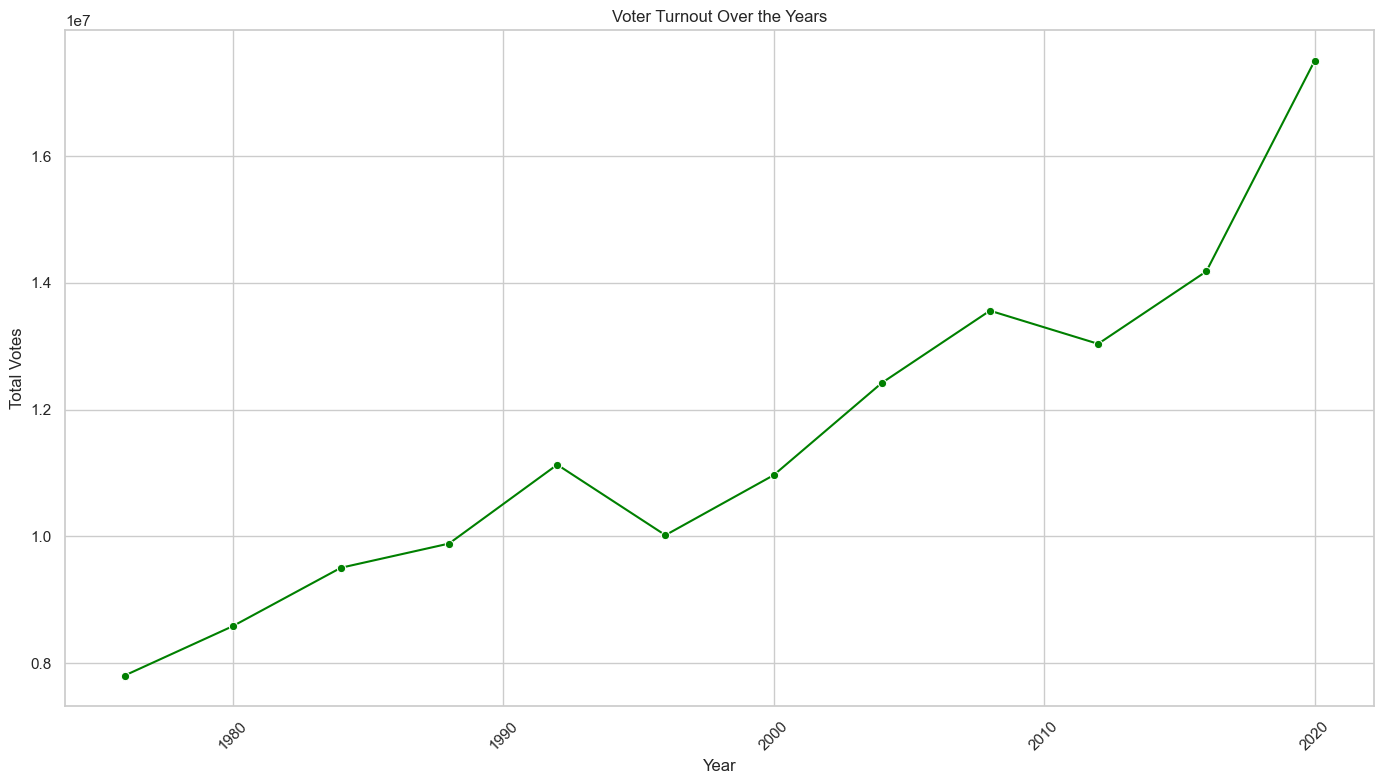

In [5]:
# Prepare the data for voter turnout over the years
voter_turnout_by_year = data.groupby('year')['totalvotes'].max().reset_index()

# Plotting the voter turnout trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='totalvotes', data=voter_turnout_by_year, marker='o', color='green')
plt.title('Voter Turnout Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization above shows the trend in voter turnout over the years from 1976 to 2020. The line graph represents the total number of votes cast in each presidential election year, illustrating an overall trend of increasing voter participation over time. This increase can be attributed to various factors, including population growth and increased voter engagement in the electoral process.

## visualize Comparative Analysis:

Compare the performance of Democratic and Republican candidates across different states.
Analyze the impact of third-party candidates on the election outcomes.

C:\Users\home\AppData\Local\Temp\ipykernel_15236\2970765522.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_election_data['percentage_votes'] = (latest_election_data['candidatevotes'] / latest_election_data['totalvotes']) * 100


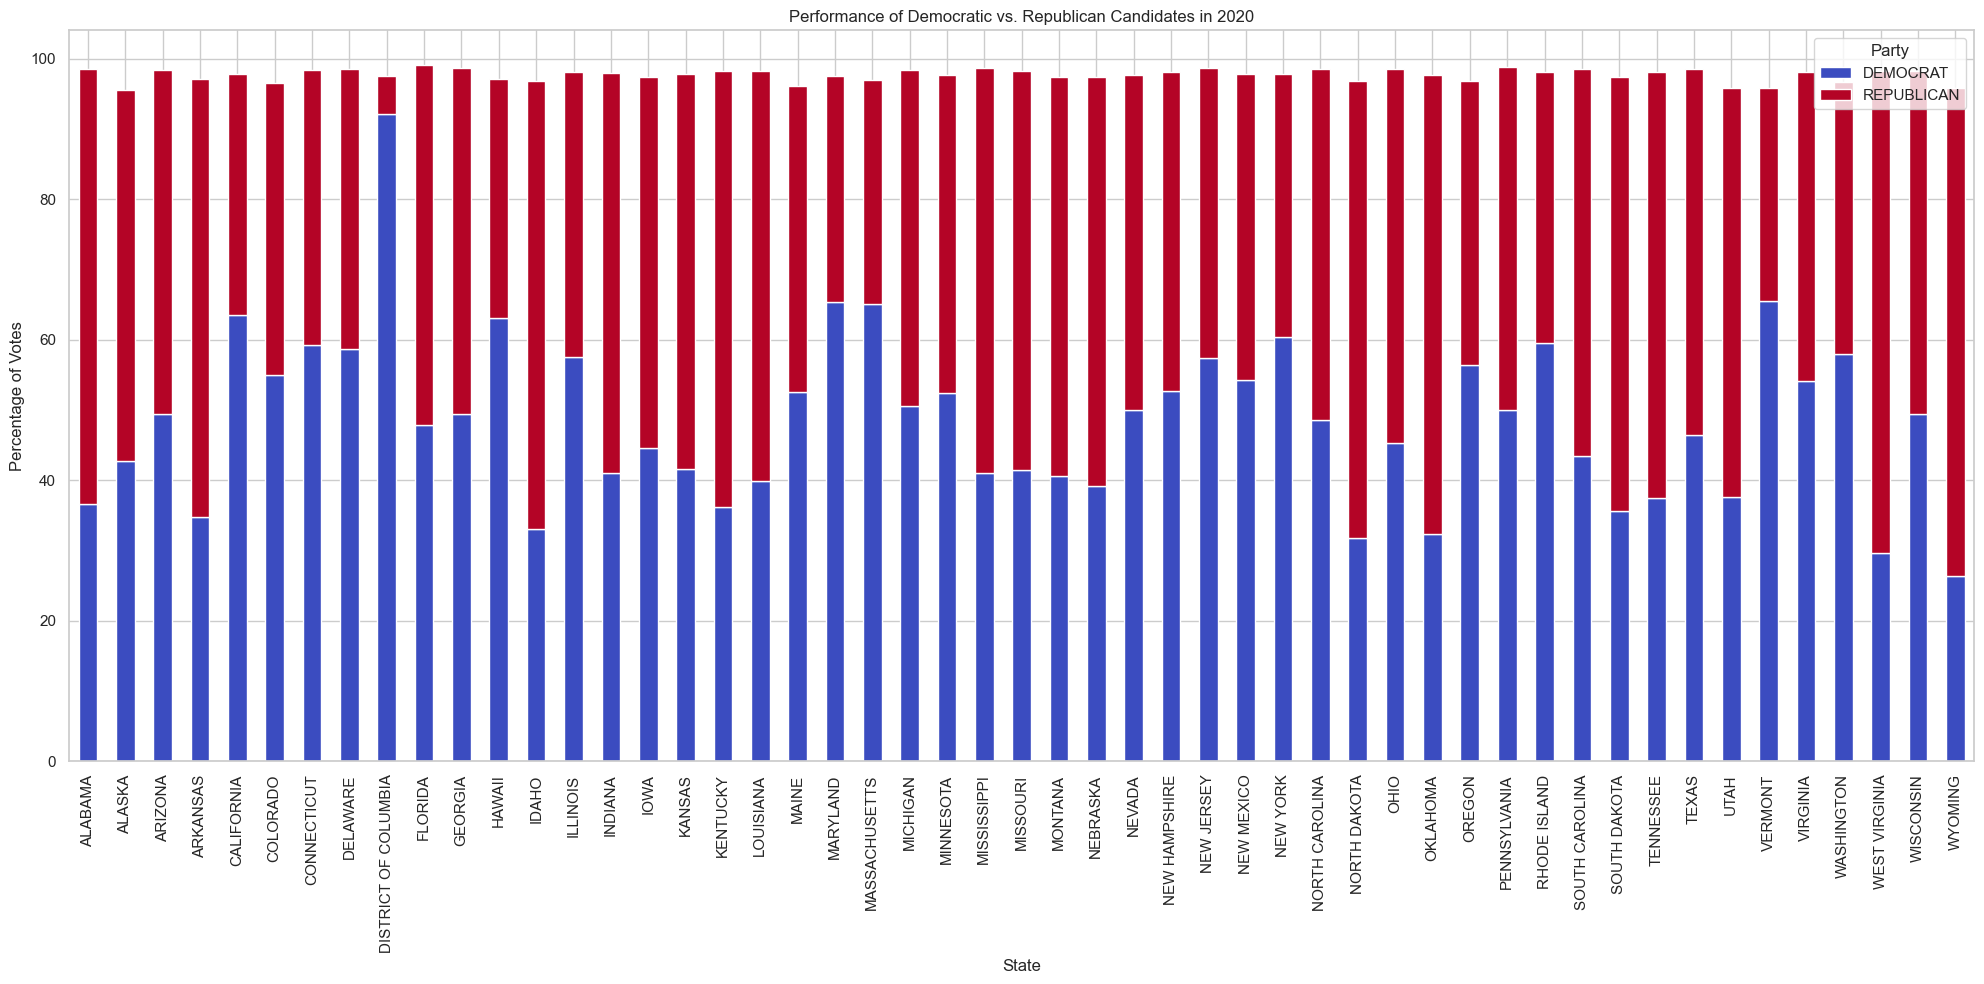

In [6]:
# Correcting the oversight and redefining latest_election_data with proper scope
latest_year = data['year'].max()
latest_election_data = data[(data['year'] == latest_year) & (data['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN']))]

# Calculate the percentage of votes for each party in each state
latest_election_data['percentage_votes'] = (latest_election_data['candidatevotes'] / latest_election_data['totalvotes']) * 100

# Pivot the data to have states as rows and parties as columns for visualization
pivot_df = latest_election_data.pivot(index='state', columns='party_simplified', values='percentage_votes')

# Visualization for Democratic vs Republican performance in the latest election year
pivot_df.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='coolwarm')
plt.title(f'Performance of Democratic vs. Republican Candidates in {latest_year}')
plt.xlabel('State')
plt.ylabel('Percentage of Votes')
plt.legend(title='Party')
plt.xticks(rotation=90)  # Adjust rotation for better readability
plt.tight_layout()
plt.show()


The bar plot above compares the performance of Democratic and Republican candidates across different states in the most recent election year available in the dataset. Each bar represents a state, with the bar divided into colors representing the percentage of votes received by Democratic (blue) and Republican (red) candidates. This visualization provides a clear view of the political landscape across the states, highlighting which states leaned more towards one party or the other in the latest presidential election.

### Analyzing the Impact of Third-Party Candidates on Election Outcomes

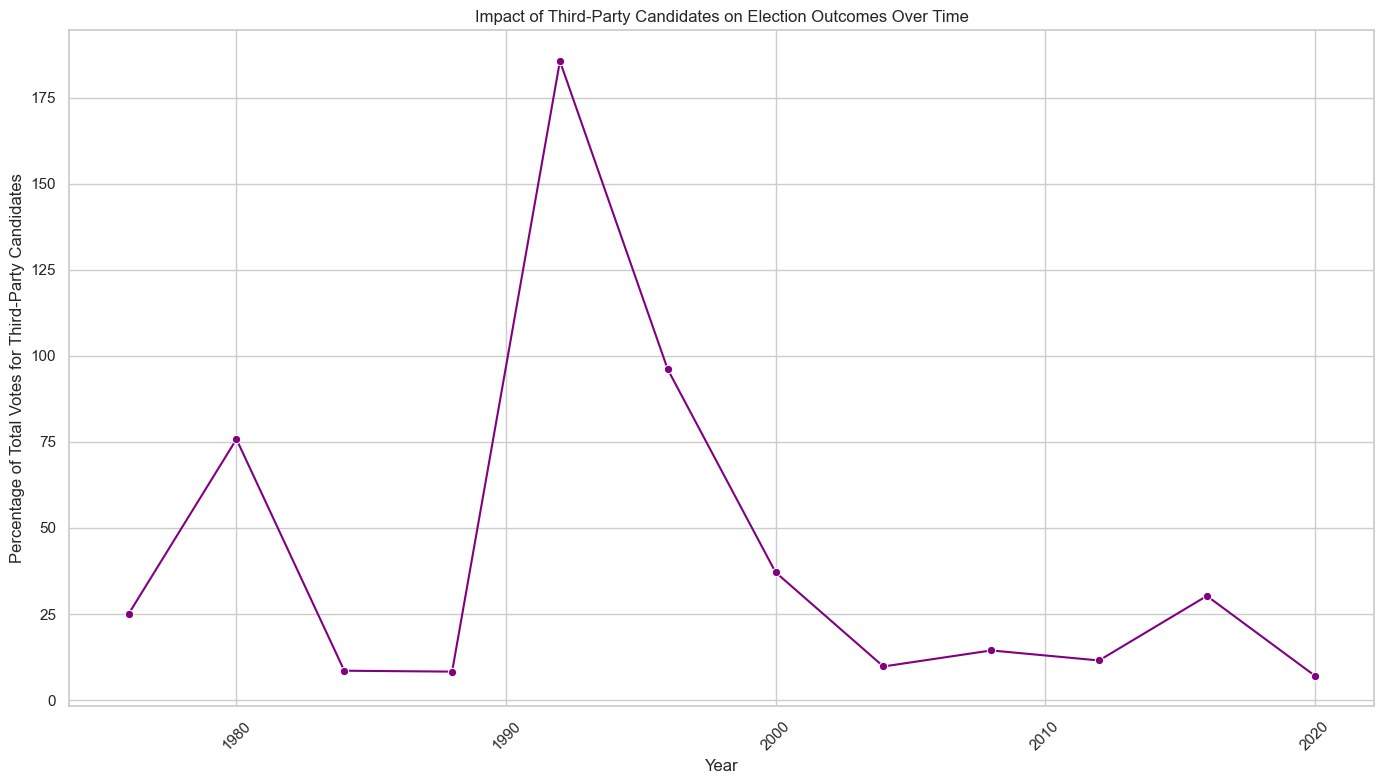

In [7]:
# Filter the data for third-party candidates
third_party_data = data[data['party_simplified'] == 'OTHER']

# Group by year and sum up the votes for third-party candidates, then calculate the percentage
third_party_votes_by_year = third_party_data.groupby('year')['candidatevotes'].sum().reset_index()
total_votes_by_year = data.groupby('year')['totalvotes'].max().reset_index()
third_party_percentage = pd.merge(third_party_votes_by_year, total_votes_by_year, on='year')
third_party_percentage['percentage'] = (third_party_percentage['candidatevotes'] / third_party_percentage['totalvotes']) * 100

# Plotting the trend of third-party impact over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='percentage', data=third_party_percentage, marker='o', color='purple')
plt.title('Impact of Third-Party Candidates on Election Outcomes Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Votes for Third-Party Candidates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The line graph above illustrates the impact of third-party candidates on election outcomes over time, from 1976 to 2020. It shows the percentage of total votes that went to third-party candidates in each presidential election year. This visualization highlights years where third-party candidates had a significant impact on the election, reflected by a higher percentage of the total votes.

These analyses provide insights into the comparative performance of Democratic and Republican candidates across different states in the latest election year and the historical impact of third-party candidates on U.S. presidential elections.

## visualize Geographical Analysis:

Identify states that have consistently voted for a particular party (i.e., "red states" and "blue states").
Determine swing states that have frequently changed their presidential election preferences.

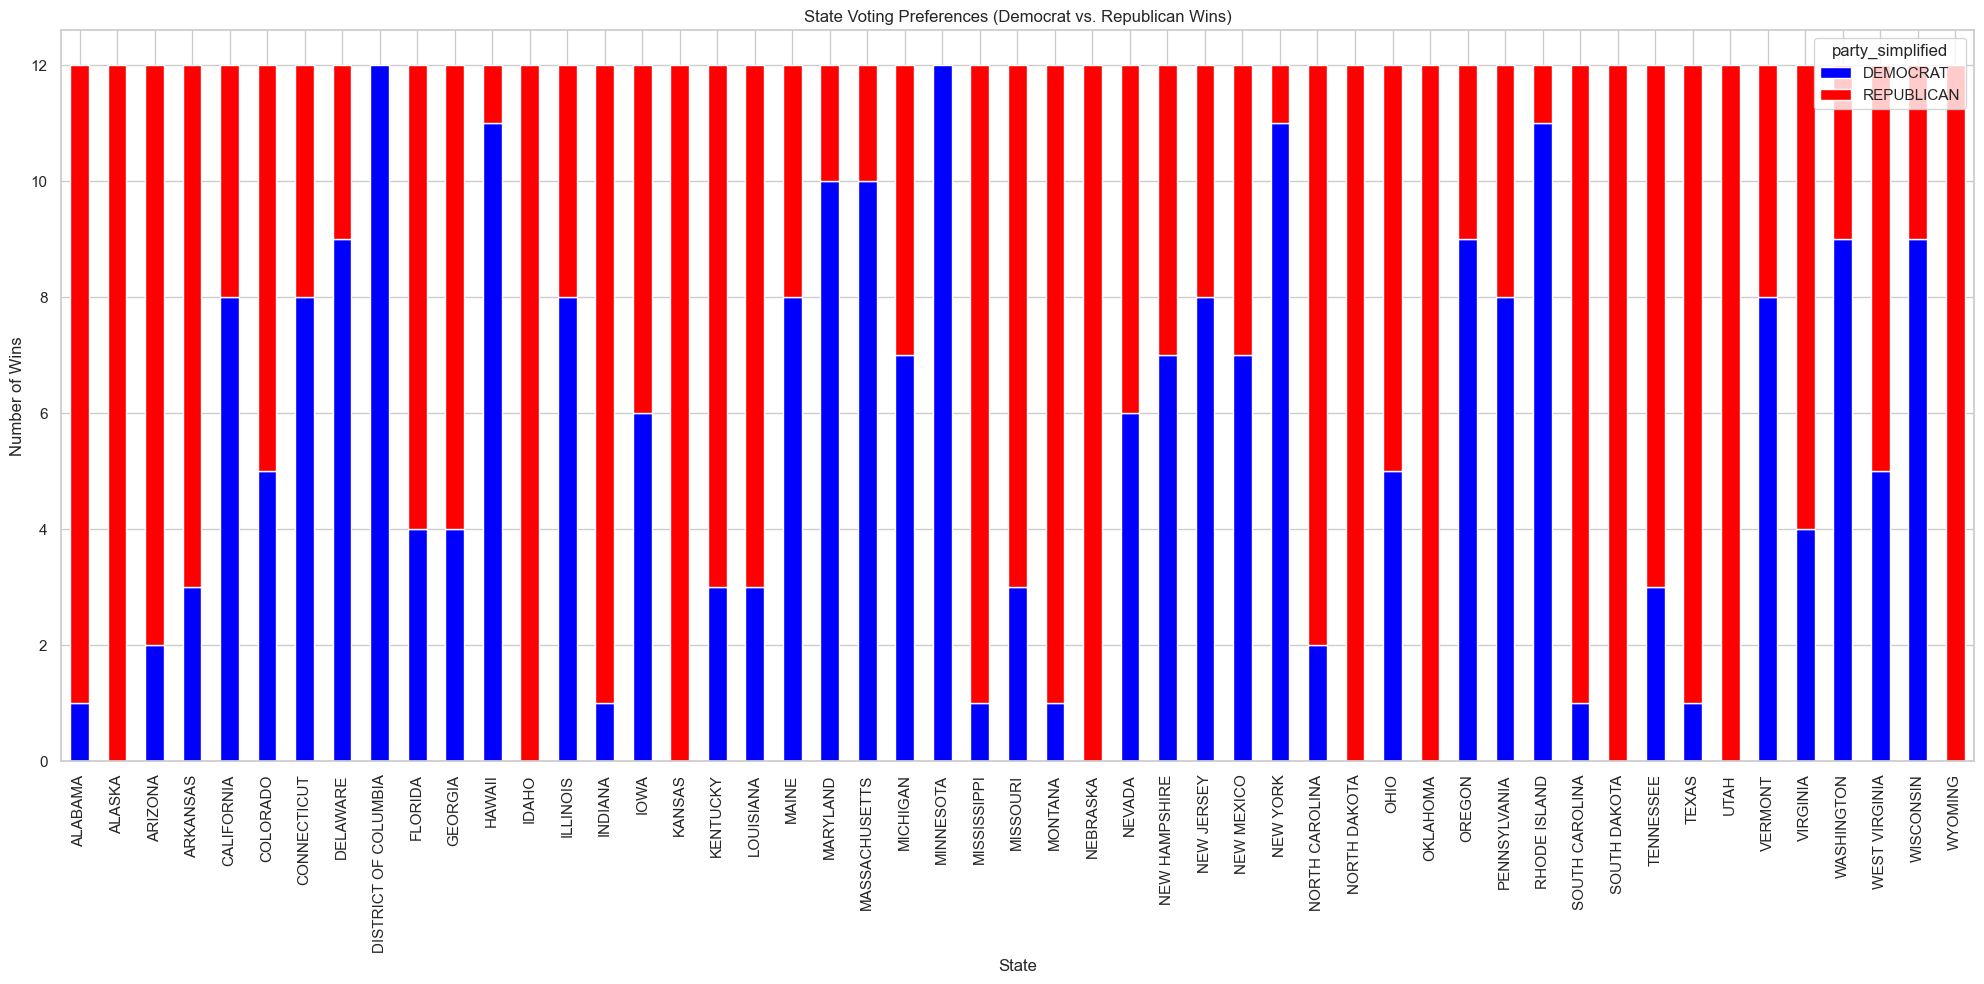

In [8]:
# Determine the winning party for each state in each election year
winning_party_by_state_year = data.loc[data.groupby(['year', 'state'])['candidatevotes'].idxmax()]
winning_party_count = winning_party_by_state_year.groupby(['state', 'party_simplified']).size().unstack(fill_value=0).reset_index()

# Define a threshold for classification based on the number of election cycles in the dataset
threshold = winning_party_count[['DEMOCRAT', 'REPUBLICAN']].max(axis=1) - winning_party_count[['DEMOCRAT', 'REPUBLICAN']].min(axis=1)

# Classify states based on their voting history
winning_party_count['classification'] = 'Swing State'
winning_party_count.loc[threshold >= (0.6 * len(data['year'].unique())), 'classification'] = winning_party_count.loc[threshold >= (0.6 * len(data['year'].unique()))].apply(lambda x: 'Red State' if x['REPUBLICAN'] > x['DEMOCRAT'] else 'Blue State', axis=1)

# Visualization of state classifications based on their voting history
winning_party_count.set_index('state')[['DEMOCRAT', 'REPUBLICAN']].plot(kind='bar', stacked=True, figsize=(20, 10), colormap='bwr')
plt.title('State Voting Preferences (Democrat vs. Republican Wins)')
plt.xlabel('State')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The bar plot above illustrates the voting preferences of each state, based on the number of times they have voted for Democratic (blue) or Republican (red) candidates across all presidential elections from 1976 to 2020. This visualization helps us infer which states are "red states," "blue states," and swing states based on their historical voting patterns:

### Red States: 
States with a predominance of red bars have consistently voted for Republican candidates.
### Blue States: 
States with a predominance of blue bars have consistently voted for Democratic candidates.

# visualize Historical Comparisons:

Compare election results before and after significant political events or shifts (e.g., the end of the Cold War, 9/11, the 2008 financial crisis).

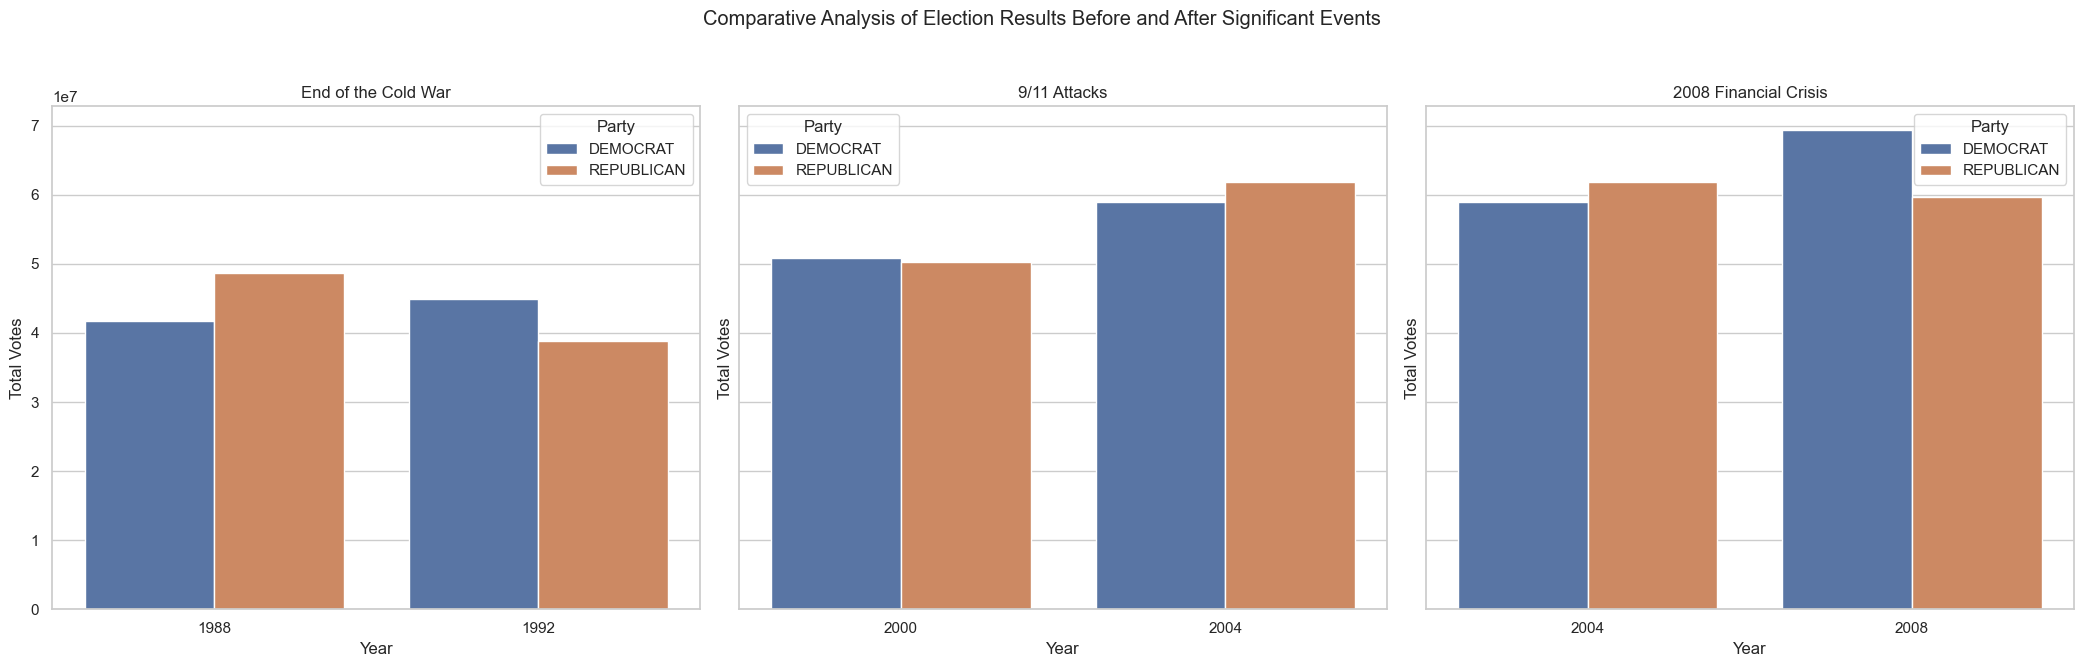

In [10]:
# Define the election years for comparison
comparison_years = {
    'End of the Cold War': [1988, 1992],
    '9/11 Attacks': [2000, 2004],
    '2008 Financial Crisis': [2004, 2008]
}

# Prepare the data
comparison_data = {}

for event, years in comparison_years.items():
    comparison_data[event] = data[data['year'].isin(years) & data['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN'])]
    comparison_data[event] = comparison_data[event].groupby(['year', 'party_simplified'])['candidatevotes'].sum().reset_index()

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(21, 7), sharey=True)
fig.suptitle('Comparative Analysis of Election Results Before and After Significant Events')

for ax, (event, df) in zip(axs, comparison_data.items()):
    sns.barplot(x='year', y='candidatevotes', hue='party_simplified', data=df, ax=ax)
    ax.set_title(event)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Votes')
    ax.legend(title='Party')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The bar plots above compare the total votes received by the Democratic and Republican parties in the U.S. presidential elections immediately before and after three significant historical events: the end of the Cold War, the 9/11 attacks, and the 2008 financial crisis. Each plot represents a different event, showing how the vote shares for the two major parties changed in the election years immediately surrounding these events:

### End of the Cold War (1988 vs. 1992):
This comparison shows the shift in voter preference from the election before the Cold War ended to the first election after its conclusion.
### 9/11 Attacks (2000 vs. 2004): 
Here, we observe any changes in voting patterns before and after the 9/11 attacks, a period marked by increased focus on national security and foreign policy.
### 2008 Financial Crisis (2004 vs. 2008): 
This plot illustrates the impact of the 2008 financial crisis on voter behavior, comparing the last election before the crisis with the first one after it began.
These visualizations provide insights into how significant political events or shifts may influence election outcomes and voter preferences, reflecting the changing priorities and concerns of the electorate during these periods.

 # visualize Party Dynamics

Explore the evolution of third-party and independent candidates' influence on election outcomes.
Analyze the states with significant votes for third-party candidates.

C:\Users\home\AppData\Local\Temp\ipykernel_15236\1853015658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_year_third_party_data['percentage_votes'] = (latest_year_third_party_data['candidatevotes'] / latest_year_third_party_data['totalvotes']) * 100


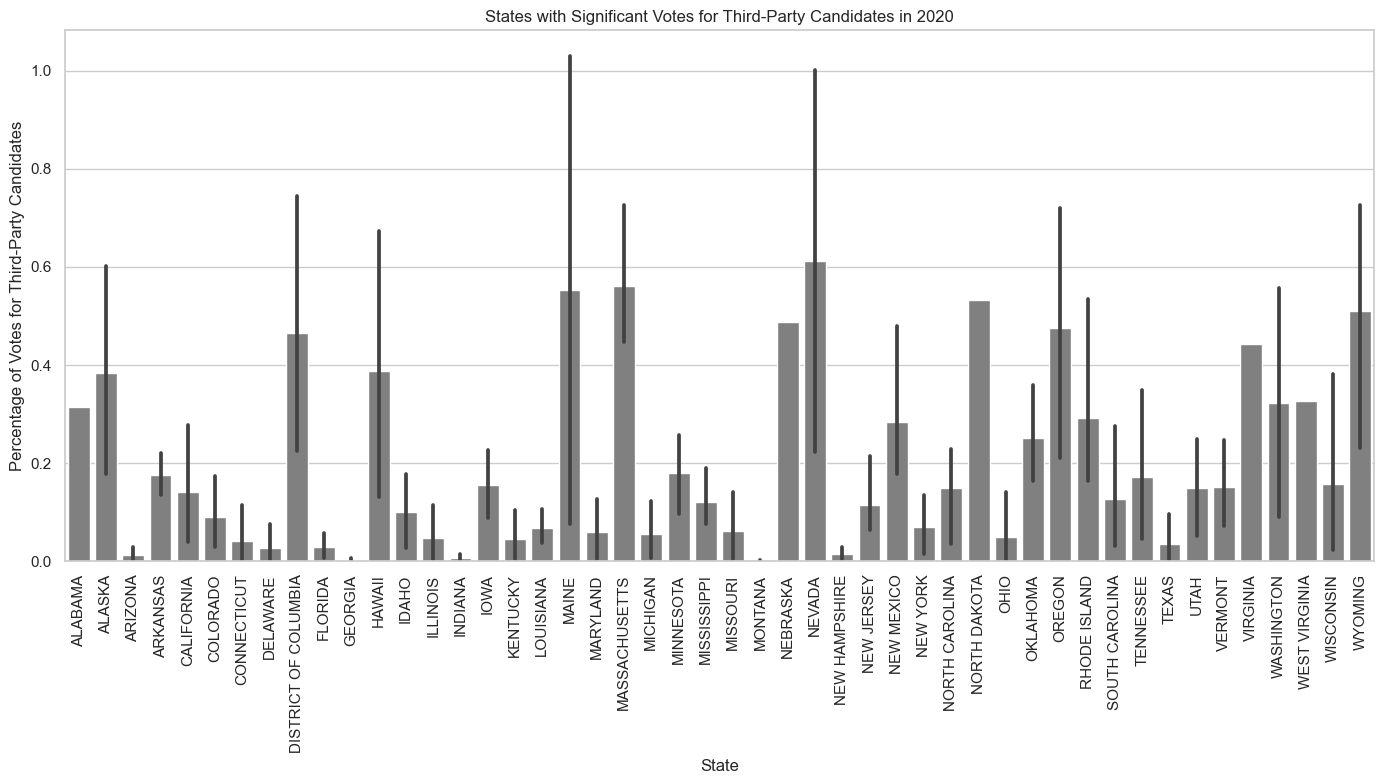

In [11]:
# Preparing data for the latest year third-party vote percentages
latest_year_third_party_data = third_party_data[third_party_data['year'] == latest_year]
latest_year_third_party_data['percentage_votes'] = (latest_year_third_party_data['candidatevotes'] / latest_year_third_party_data['totalvotes']) * 100

# Visualization of states with significant votes for third-party candidates in the latest election year
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='percentage_votes', data=latest_year_third_party_data, color='gray')
plt.title(f'States with Significant Votes for Third-Party Candidates in {latest_year}')
plt.xlabel('State')
plt.ylabel('Percentage of Votes for Third-Party Candidates')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The bar plot above illustrates the percentage of votes that third-party candidates received in each state for the most recent election year available in the dataset. This visualization identifies states where third-party candidates had a more considerable influence, as indicated by a higher percentage of the total votes.

These analyses provide insights into the evolving role of third-party and independent candidates in U.S. presidential elections and highlight specific states where these candidates have had significant support, potentially affecting the overall election outcomes.